# Rod Cutting Problem 시각화

이 노트북은 막대 자르기 문제를 동적 프로그래밍으로 해결하고 과정을 시각화합니다.

## 필요한 라이브러리 임포트

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from IPython.display import clear_output
import time

def set_korean_font():
    """한글 폰트 설정"""
    system = platform.system()
    if system == "Darwin":  # macOS
        plt.rc('font', family='AppleGothic')
    elif system == "Windows":  # Windows
        plt.rc('font', family='Malgun Gothic')
    elif system == "Linux":  # Linux
        plt.rc('font', family='NanumGothic')
    plt.rc('axes', unicode_minus=False)

# 한글 폰트 설정
set_korean_font()

## 시각화 함수 정의

In [6]:
def visualize_rod(length, cuts, prices, title="막대 자르기"):
    """막대 자르기 시각화"""
    plt.figure(figsize=(12, 4))
    
    # 전체 막대 그리기
    plt.barh(0, length, height=0.5, color='lightgray', label='원래 막대')
    
    # 자른 부분 표시
    current_x = 0
    colors = plt.cm.Set3(np.linspace(0, 1, len(cuts)))
    
    for i, cut in enumerate(cuts):
        plt.barh(0, cut, left=current_x, height=0.5, 
                color=colors[i], label=f'길이 {cut} (${prices[i]})')
        
        # 가격 표시
        plt.text(current_x + cut/2, 0, f'${prices[i]}', 
                ha='center', va='center')
        
        current_x += cut
    
    plt.title(title)
    plt.xlabel('길이')
    plt.yticks([])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, axis='x')
    plt.tight_layout()
    plt.show()

def visualize_dp_table(dp, price, n):
    """DP 테이블 시각화"""
    plt.figure(figsize=(12, 4))
    
    # 데이터 준비
    data = np.zeros((2, n+1))
    price_padded = np.pad(price, (0, 1), 'constant')  # 가격 배열 패딩
    data[0, :] = price_padded[:n+1]  # 가격
    data[1, :] = dp[:n+1]     # DP 값
    
    # 히트맵 생성
    plt.imshow(data, aspect='auto', cmap='YlOrRd')
    
    # 값 표시
    for i in range(2):
        for j in range(n+1):
            plt.text(j, i, f'${int(data[i,j])}', 
                    ha='center', va='center')
    
    plt.title('DP 테이블 진행상황')
    plt.xlabel('막대 길이')
    plt.ylabel('값')
    plt.yticks([0, 1], ['가격', '최대 가치'])
    plt.colorbar(label='가치 ($)')
    plt.tight_layout()
    plt.show()

## Rod Cutting 알고리즘 구현

In [7]:
def rod_cutting(price, n):
    """Rod Cutting 문제 해결 (동적 프로그래밍)"""
    dp = [0] * (n + 1)
    cut_points = [[] for _ in range(n + 1)]
    
    print("DP 테이블 계산 중...")
    
    for i in range(1, n + 1):
        max_val = float('-inf')
        current_cuts = []
        
        for j in range(i):
            val = price[j] + dp[i-j-1]
            if val > max_val:
                max_val = val
                current_cuts = [j+1] + cut_points[i-j-1]
        
        dp[i] = max_val
        cut_points[i] = current_cuts
        
        # 현재 상태 시각화
        clear_output(wait=True)
        print(f"\n길이 {i}의 막대 처리 중:")
        visualize_dp_table(dp, price, n)
        if current_cuts:
            visualize_rod(i, current_cuts, 
                         [price[c-1] for c in current_cuts],
                         f"길이 {i}의 최적 자르기 방법")
        time.sleep(1)
    
    return dp[n], cut_points[n]

## 예제 실행


길이 8의 막대 처리 중:


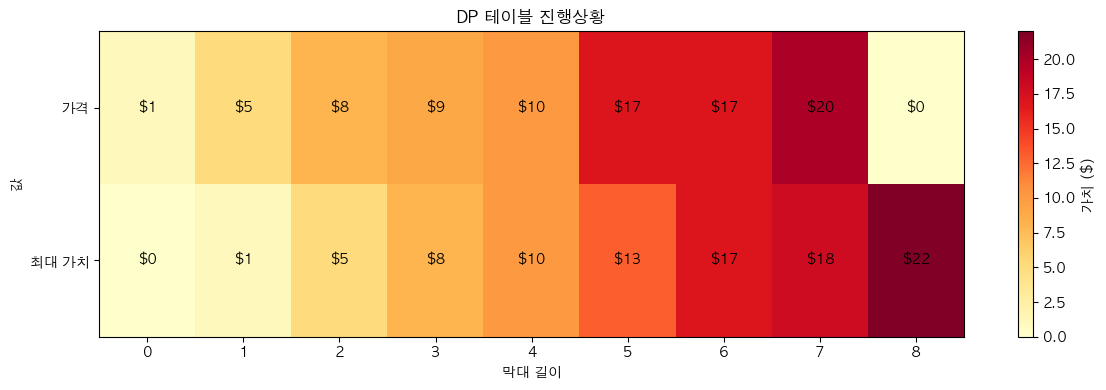

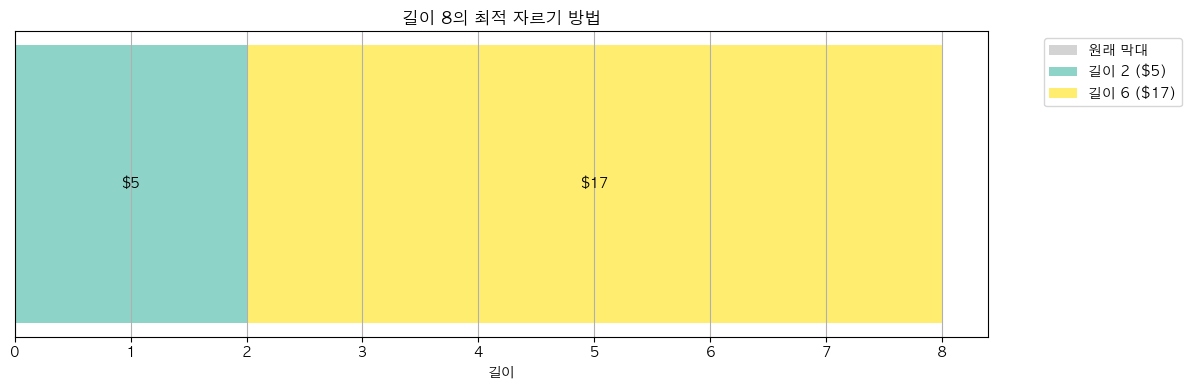


최종 결과:
최대 수익: $22
자르기 방법: [2, 6]


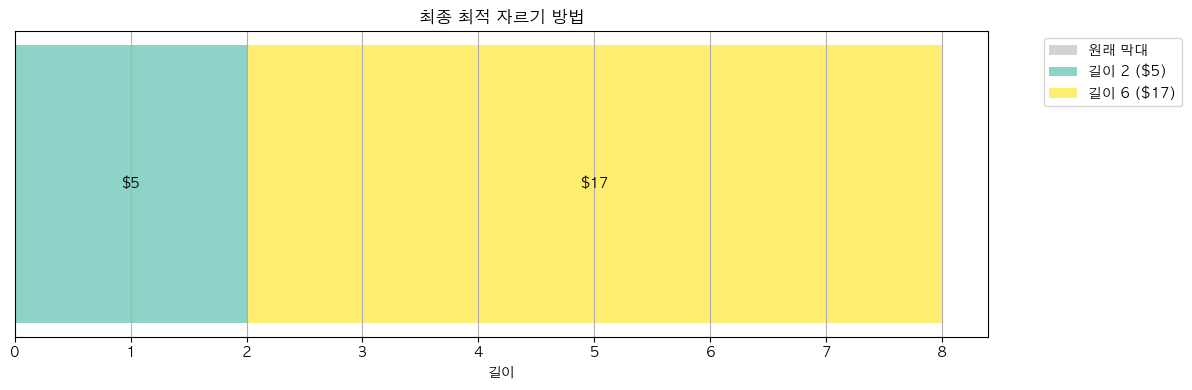

In [9]:
# 예제 가격표
price = [1, 5, 8, 9, 10, 17, 17, 20]  # 길이 1부터 8까지의 가격
n = len(price)

print(f"막대 길이: {n}")
print("가격표:")
for i, p in enumerate(price, 1):
    print(f"길이 {i}: ${p}")

max_value, cuts = rod_cutting(price, n)

print("\n최종 결과:")
print(f"최대 수익: ${max_value}")
print(f"자르기 방법: {cuts}")

# 최종 결과 시각화
visualize_rod(n, cuts, [price[c-1] for c in cuts], 
             "최종 최적 자르기 방법")